## STIMA PERIODO DI OSCILLAZIONE $T$

[2.0584036  2.04860419 2.03912633 2.0299403  2.02102071 2.01234563
 2.00389599 1.99565509 1.98760816] [2.0557 2.0511 2.0418 2.0305 2.0181 2.0109 2.0049 1.995  1.9886]
[ 0.0027036  -0.00249581 -0.00267367 -0.0005597   0.00292071  0.00144563
 -0.00100401  0.00065509 -0.00099184]
[2.01415754 2.01212286 2.01015495 2.00824763 2.00639563 2.0045944
 2.00283998 2.0011289  1.9994581 ] [2.0133 2.0122 2.0112 2.0087 2.0066 2.0038 2.0025 2.0013 1.9995]
[ 8.57541957e-04 -7.71370846e-05 -1.04505055e-03 -4.52369079e-04
 -2.04367614e-04  7.94402540e-04  3.39981899e-04 -1.71099636e-04
 -4.19034954e-05]

linearità A + BX
    
A: 2.337602491312939 
B: -1.055272604222471
sigmaA: 0.010196523734295259
sigmaB: 0.03398841229855687

sigmaY: [0.00223564 0.00222424 0.0022109  0.00220751 0.00222387 0.00224809
 0.00221594 0.00221071 0.00224067]
chiquadro ridotto: (2.389160706217271e-06, 4)
df: 7
    


linearità A + BX
    
A: 2.072128349088105 
B: -0.21910905567251696
sigmaA: 0.0029542326522648196
sigmaB: 0.009847

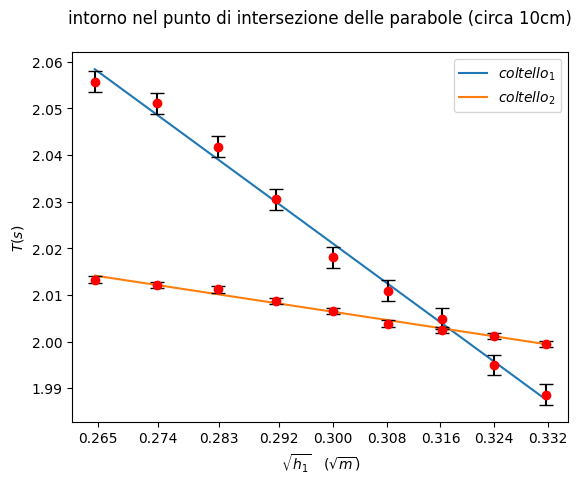

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'misure_fini.csv'
fr = pd.read_csv(FILE)

h1 = (np.array(fr['d'])) * 0.01 # m
h1_sqrt = np.sqrt(h1)

# deviazione standard della media con correzione di bessel
def dev_std(a: np.ndarray) -> np.float64:
    mean = np.mean(a)
    return np.sqrt((np.sum(((a - mean)**2))/(len(a)-1)))/np.sqrt(len(a))

t1 =np.array(fr["t1"]) # s
t2 =np.array(fr["t2"])
t3 =np.array(fr["t3"])
t4 =np.array(fr["t4"])
T1 =np.array(fr["T1"])
T2 =np.array(fr["T2"])
T3 =np.array(fr["T3"])
T4 =np.array(fr["T4"])

dev_stdt = np.array([dev_std(np.array([t1[i],t2[i],t3[i],t4[i]])) for i in range(0,len(h1))])
dev_stdT = np.array([dev_std(np.array([T1[i],T2[i],T3[i],T4[i]])) for i in range(0,len(h1))])

periodo1 = np.array(fr["AVG t"]) # valore medio già calcolato con excel
periodo2 = np.array(fr["AVG T"])

r1 = RettaInterpolata(h1_sqrt,periodo1, dev_stdt)
r2 = RettaInterpolata(h1_sqrt,periodo2, dev_stdT)

plt.plot(r1.x_best,r1.y_best,label="$coltello_1$")
plt.plot(r2.x_best,r2.y_best,label="$coltello_2$")
plt.errorbar(h1_sqrt,periodo1,fmt='o',yerr=r1.sigmaY,color="red",ecolor="black",capsize=5)
plt.errorbar(h1_sqrt,periodo2,fmt='o',yerr=r2.sigmaY,color="red",ecolor="black",capsize=5)

print(r1)
print(r2)

plt.legend()
plt.title("intorno nel punto di intersezione delle parabole (circa 10cm)\n")
plt.xticks(np.round(h1_sqrt,3))
plt.ylabel('$T (s)$')
plt.xlabel("$\sqrt{h_1}\quad(\sqrt{m})$")
plt.show()

## MISURA DEL PERIODO $T*$

usando la formula data con i valori ricavati dalle interpolazioni

$T* = \frac{T_2(x_a)T_1(x_b)-T_1(x_a)T_2(x_b)}{T_1(x_b)-T_2(x_b)-T_1(x_a)+T_2(x_a)}$

In [2]:
T1 = lambda x: r1.A + r1.B * x
T2 = lambda x: r2.A + r2.B * x

xa = h1_sqrt[6]
xb = h1_sqrt[7]

T = (T2(xa)*T1(xb) - T1(xa)*T2(xb))/(T1(xb)-T2(xb)-T1(xa)+T2(xa))

T1xa, T1xb = r1.sigmaY[6],r1.sigmaY[7]
T2xa, T2xb = r2.sigmaY[6],r2.sigmaY[7]

no = T2(xa)*T1(xb)*np.sqrt((T2xa/T2(xa))**2 + (T1xb/T1(xb))**2)
ne = T1(xa)*T2(xb)*np.sqrt((T1xa/T1(xa))**2 + (T2xb/T2(xb))**2)
s = np.sqrt(T1xa**2+T2xb**2+T1xb**2+T2xa**2)
n = np.sqrt(no**2+ne**2)

sigmaT = T*np.sqrt((n/(T2(xa)*T1(xb) - T1(xa)*T2(xb)))**2 + (s/(T1(xb)-T2(xb)-T1(xa)+T2(xa)))**2)

print('T: ',final_val(T,sigmaT,decimals=4))

T:  2.0026 ± 1.4138 


usando i punti più vicini all'intersezione:

In [3]:
T1xa,T1xb = periodo1[6],periodo1[7]
T2xa,T2xb = periodo2[6],periodo2[7]

T = (T2xa*T1xb - T1xa*T2xb)/(T1xb-T2xb-T1xa+T2xa)

sT1xa, sT1xb = dev_stdt[6],dev_stdt[7]
sT2xa, sT2xb = dev_stdT[6],dev_stdT[7]

no = T2xa*T1xb*np.sqrt((sT2xa/T2xa)**2 + (sT1xb/T1xb)**2)
ne = T1xa*T2xb*np.sqrt((sT1xa/T1xa)**2 + (sT2xb/T2xb)**2)
s = np.sqrt(sT1xa**2+sT2xb**2+sT1xb**2+sT2xa**2)
n = np.sqrt(no**2+ne**2)

sigmaT = T*np.sqrt((n/(T2xa*T1xb - T1xa*T2xb))**2 + (s/(T1xb-T2xb-T1xa+T2xa))**2)

print('T: ',final_val(T,sigmaT,decimals=4))

T:  2.0022 ± 0.096 


risolvendo invece il sistema lineare 

$T^* = \frac{A_1B_2-A_2B_1}{B_2-B_1}$

In [4]:
A1,A2 = r1.A,r2.A
B1,B2 = r1.B,r2.B

sA1,sA2 = r1.sigmaA,r2.sigmaA
sB1,sB2 = r1.sigmaB,r2.sigmaB

T = (A1*B2 - A2*B1)/(B2-B1)

no = A1*B2*np.sqrt((sA1/A1)**2+(sA2/A2)**2)
ne = A2*B1*np.sqrt((sA2/A2)**2+(sB1/B1)**2)
n = np.sqrt(no**2+ne**2)
s = np.sqrt(sB1**2+sB2**2)
sigmaT = T*np.sqrt((n/(A1*B2 - A2*B1))**2+(s/(B2-B1))**2)

print('T: ',final_val(T,sigmaT,decimals=4))

T:  2.0026 ± 0.1196 


risolvendo il sistema lineare diversamente:

$T^* = A_1+B_1\frac{A_1-A_2}{B_2-B_1}$

In [5]:
T = A1 + B1*(A1-A2)/(B2-B1)

A = np.sqrt(sA1**2+sA2**2)
B = np.sqrt(sB2**2+sB1**2)
x = np.sqrt((A/(A1-A2))**2+(B/(B2-B1))**2)*((A1-A2)/(B2-B1))
bx = ((A1-A2)/(B2-B1))*B1*np.sqrt((sB1/B1)**2+(x/((A1-A2)/(B2-B1)))**2)
sigmaT = np.sqrt(bx**2+sA1**2)

print('T: ',final_val(T,sigmaT,decimals=4))

T:  2.0026 ± 0.0245 


# PROPAGAZIONE DELL'ERRORE CORRETTA

$a = T_1(x_a) \\ c = T_1(x_b) \\
b = T_2(x_a) \\ d = T_2(x_b)$

$\sigma_T = \sqrt{
    \left(\frac{\partial T}{\partial a}\right)^2\sigma_{a}^2 +
    \left(\frac{\partial T}{\partial b}\right)^2\sigma_{b}^2 +
    \left(\frac{\partial T}{\partial c}\right)^2\sigma_{c}^2 +
    \left(\frac{\partial T}{\partial d}\right)^2\sigma_{d}^2
}$

In [6]:
T1 = lambda x: r1.A + r1.B * x # definisco le funzioni come sopra
T2 = lambda x: r2.A + r2.B * x

xa = h1_sqrt[6] # prendo i valori delle x più vicine all'intersezione
xb = h1_sqrt[7]

a = T1(xa) # rinomino le variabili
b = T2(xa)
c = T1(xb)
d = T2(xb)

T = (b*c - a*d)/(c-d-a+b) # calcolo il periodo

sa, sb = r1.sigmaY[6],r1.sigmaY[7] # raccolgo i sigma
sc, sd = r2.sigmaY[6],r2.sigmaY[7]

g = (c-d-a+b) # holder per accorciare le formule
f = (b*c-a*d)

dTda = (-d*g+f) / g**2 # derivate parziali
dTdb = (c*g-f) / g**2
dTdc = (b*g-f) / g**2
dTdd = (-a*g+f) / g**2

sigmaT = np.sqrt((dTda*sa)**2 + (dTdb*sb)**2 + (dTdc*sc)**2 + (dTdd*sd)**2)

print('T: ',final_val(T,sigmaT,decimals=4))



T:  2.0026 ± 0.0024 
